In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 6 ##

## Table Review ##

In [2]:
movies = Table.read_table('movies_by_year_with_ticket_price.csv')
movies.show(8)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2019,9.16,11237.9,788,Avengers: Endgame
2018,9.11,11611.3,878,Black Panther
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi
2016,8.65,11373.7,737,Rogue One: A Star Wars Story
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens
2014,8.17,10436.8,708,American Sniper
2013,8.13,10955.9,689,The Hunger Games: Catching Fire
2012,7.96,10959.6,669,The Avengers


In [4]:
gross_in_dollars = movies.column('Total Gross') * 1000000
tix_sold = gross_in_dollars / movies.column('Average Ticket Price')
tix_sold

array([1.22684498e+09, 1.27456641e+09, 1.24028986e+09, 1.31487861e+09,
       1.31658363e+09, 1.27745410e+09, 1.34758918e+09, 1.37683417e+09,
       1.27542245e+09, 1.29438530e+09, 1.44288000e+09, 1.35072423e+09,
       1.40853198e+09, 1.40680916e+09, 1.37358814e+09, 1.50107890e+09,
       1.50207297e+09, 1.58731034e+09, 1.42831858e+09, 1.42454545e+09,
       1.44598814e+09, 1.40208955e+09, 1.45355120e+09, 1.29110860e+09,
       1.23758621e+09, 1.24490196e+09, 1.20367150e+09, 1.10937349e+09,
       1.02467933e+09, 1.07274882e+09, 1.04145363e+09, 8.67591241e+08,
       9.11227621e+08, 8.62668464e+08, 8.60957746e+08, 9.96339286e+08,
       8.42190476e+08, 9.74897959e+08, 8.20827338e+08, 8.54646840e+08,
       7.92510121e+08, 6.63376068e+08, 6.15739910e+08])

In [5]:
movies = movies.with_column('Tickets sold', tix_sold)
movies.show (7)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2019,9.16,11237.9,788,Avengers: Endgame,1.22684e+09
2018,9.11,11611.3,878,Black Panther,1.27457e+09
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi,1.24029e+09
2016,8.65,11373.7,737,Rogue One: A Star Wars Story,1.31488e+09
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens,1.31658e+09
2014,8.17,10436.8,708,American Sniper,1.27745e+09
2013,8.13,10955.9,689,The Hunger Games: Catching Fire,1.34759e+09


In [6]:
movies.set_format('Tickets sold', NumberFormatter)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2019,9.16,11237.9,788,Avengers: Endgame,"1,226,844,978.17"
2018,9.11,11611.3,878,Black Panther,"1,274,566,410.54"
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi,"1,240,289,855.07"
2016,8.65,11373.7,737,Rogue One: A Star Wars Story,"1,314,878,612.72"
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens,"1,316,583,629.89"
2014,8.17,10436.8,708,American Sniper,"1,277,454,100.37"
2013,8.13,10955.9,689,The Hunger Games: Catching Fire,"1,347,589,175.89"
2012,7.96,10959.6,669,The Avengers,"1,376,834,170.85"
2011,7.93,10114.1,601,Harry Potter and the Deathly Hallows: Part 2,"1,275,422,446.41"
2010,7.89,10212.7,538,Toy Story 3,"1,294,385,297.85"


In [7]:
movies.where('Year', are.between(2000, 2005))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2004,6.21,9321.7,551,Shrek 2,"1,501,078,904.99"
2003,6.03,9057.5,506,The Lord of the Rings: The Return of the King,"1,502,072,968.49"
2002,5.8,9206.4,480,Spider-Man,"1,587,310,344.83"
2001,5.65,8070,356,Harry Potter and the Sorcerer's Stone,"1,428,318,584.07"
2000,5.39,7678.3,371,How the Grinch Stole Christmas,"1,424,545,454.55"


In [8]:
movies.where('#1 Movie', are.containing('Harry Potter'))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2011,7.93,10114.1,601,Harry Potter and the Deathly Hallows: Part 2,"1,275,422,446.41"
2001,5.65,8070,356,Harry Potter and the Sorcerer's Stone,"1,428,318,584.07"


In [9]:
movies.where('#1 Movie', are.containing('Star Wars'))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi,"1,240,289,855.07"
2016,8.65,11373.7,737,Rogue One: A Star Wars Story,"1,314,878,612.72"
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens,"1,316,583,629.89"
2005,6.41,8804.7,547,Star Wars: Episode III - Revenge of the Sith,"1,373,588,143.53"
1999,5.06,7316.7,385,Star Wars: Episode I - The Phantom Menace,"1,445,988,142.29"
1983,3.15,2652.9,158,Star Wars: Episode VI - Return of the Jedi,"842,190,476.19"
1980,2.69,2299,115,Star Wars: Episode V - The Empire Strikes Back,"854,646,840.15"
1977,2.23,1373.1,35,Star Wars: Episode IV - A New Hope,"615,739,910.31"


In [10]:
movies.take(np.arange(2, 5))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi,"1,240,289,855.07"
2016,8.65,11373.7,737,Rogue One: A Star Wars Story,"1,314,878,612.72"
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens,"1,316,583,629.89"


In [12]:
np.arange(2,5)

array([2, 3, 4])

## Line Plots ##

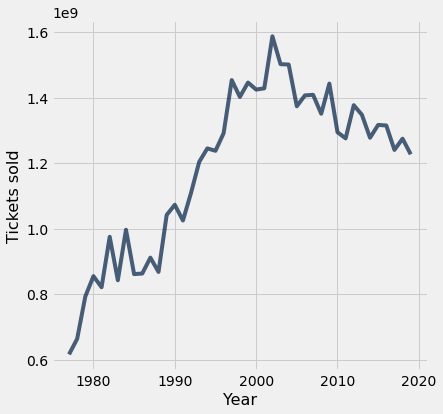

In [13]:
# line plot
movies.plot('Year', 'Tickets sold')

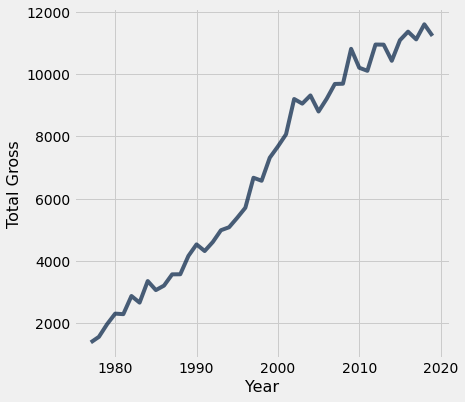

In [14]:
movies.plot('Year', 'Total Gross')

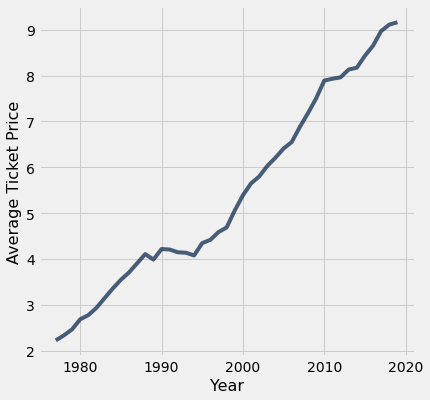

In [15]:
movies.plot('Year', 'Average Ticket Price')

## Scatter Plots ##

In [16]:
# Actors and their highest grossing movies
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


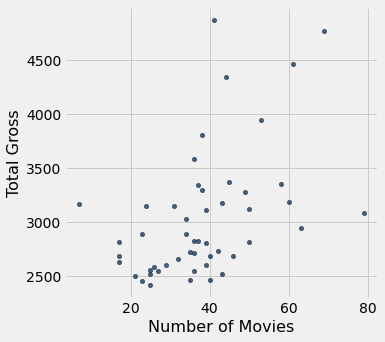

In [17]:
actors.scatter('Number of Movies', 'Total Gross')

In [18]:
actors.where('Number of Movies', are.above(75))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3


In [19]:
actors.where('Number of Movies', are.above(60))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


In [20]:
actors.where('Number of Movies', are.between(65, 75))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4


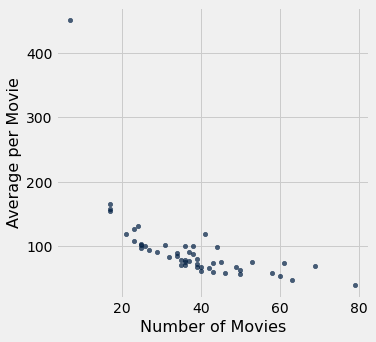

In [21]:
actors.scatter('Number of Movies', 'Average per Movie')

In [ ]:
actors.where('Average per Movie', are.above(400))

## Bar Charts ##

In [22]:
# Highest grossing movies as of 2017
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [23]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [24]:
# Convert to millions of dollars for readability
millions = np.round(top10_adjusted.column('Gross (Adjusted)') / 1000000, 3)
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18
Star Wars,Fox,460998007,1583483200,1977,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09
Titanic,Paramount,658672302,1204368000,1997,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59
Jaws,Universal,260000000,1138620700,1975,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01


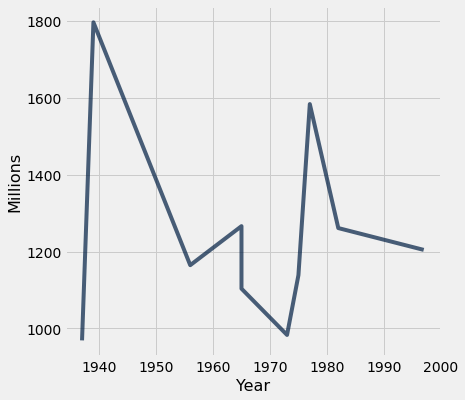

In [25]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.plot('Year', 'Millions')

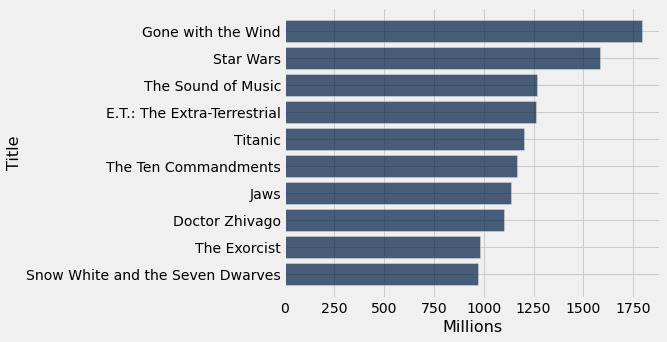

In [26]:
top10_adjusted.barh('Title', 'Millions')